## Deep Learning and Inverse Problems, Problem Set 10

03764090, Tu-Chin Chiang 


### Problem 1 Robustness of Regularized Least Squares

Start by importing some libraries needed along the way.

In [11]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

Construct the dataset and necessary matrices.

In [24]:
A = np.random.normal(loc=0.0, scale=np.sqrt(0.002), size=(500, 2000))
e = np.random.normal(loc=0.0, scale=np.sqrt(0.001), size=(500, 1))

x = np.random.normal(loc=0.0, scale=np.sqrt(0.02), size=(50, 1))
x = np.concatenate((x, np.zeros((1950, 1))), axis=0)
np.random.shuffle(x)

y = np.dot(A, x) + e

In [25]:
print('x', x.shape)
print('A', A.shape)
print('e', e.shape)
print('y', y.shape)

x (2000, 1)
A (500, 2000)
e (500, 1)
y (500, 1)


In [29]:
# L1-regularized least-squared error
def loss(A, x, y, lamb=0.05):
    return 0.5 * np.linalg.norm(A @ x - y) ** 2 + lamb * np.linalg.norm(x, ord=1)

def gradient(A, x, y, lamb=0.05):
    return A.T @ (A @ x - y) + lamb * np.sign(np.sum(x))

def mse(x_hat, x):
    return np.linalg.norm(x_hat - x) ** 2

In [38]:
lambda_iterations = np.geomspace(0.0001, 1000, 30) #logarithmic scale

max_iterations = 100
alpha = 0.0001 #step size
errs = []

for _, lamb in tqdm(enumerate(lambda_iterations)):
    xi = np.zeros((2000, 1))
    for _ in tqdm(range(max_iterations)):
        xi -= alpha * gradient(A, xi, y, lamb)

    errs.append(mse(xi, x))

0it [00:00, ?it/s]
100%|██████████| 100/100 [00:00<00:00, 712.74it/s]
1it [00:00,  6.34it/s]
100%|██████████| 100/100 [00:00<00:00, 1115.22it/s]
2it [00:00,  7.90it/s]
100%|██████████| 100/100 [00:00<00:00, 1149.56it/s]
3it [00:00,  8.43it/s]
100%|██████████| 100/100 [00:00<00:00, 1037.59it/s]
4it [00:00,  8.67it/s]
100%|██████████| 100/100 [00:00<00:00, 830.92it/s]
5it [00:00,  8.06it/s]
100%|██████████| 100/100 [00:00<00:00, 1144.22it/s]
6it [00:00,  8.23it/s]
100%|██████████| 100/100 [00:00<00:00, 1168.25it/s]
7it [00:00,  8.59it/s]
100%|██████████| 100/100 [00:00<00:00, 1095.16it/s]
8it [00:00,  8.46it/s]
100%|██████████| 100/100 [00:00<00:00, 1455.07it/s]

100%|██████████| 100/100 [00:00<00:00, 1281.40it/s]
10it [00:01,  9.16it/s]
100%|██████████| 100/100 [00:00<00:00, 1299.04it/s]
11it [00:01,  9.32it/s]
100%|██████████| 100/100 [00:00<00:00, 1311.97it/s]
12it [00:01,  9.44it/s]
100%|██████████| 100/100 [00:00<00:00, 1386.66it/s]
13it [00:01,  9.55it/s]
100%|██████████| 100/100 [

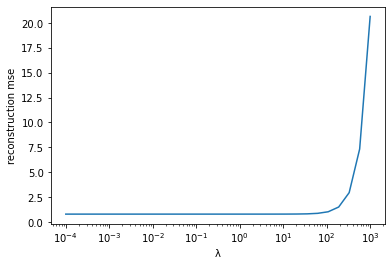

In [39]:
plt.plot(lambda_iterations, errs)
plt.xscale('log')
plt.xlabel('λ')
plt.ylabel('reconstruction mse')
plt.show()